In [5]:
# Importing libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import GridSearchCV, KFold, cross_val_score
from sklearn.metrics import confusion_matrix, accuracy_score

import keras
from keras.models import Sequential
from keras.layers import  Dense, Dropout,Activation, Flatten
from keras.wrappers.scikit_learn import KerasClassifier
from keras.optimizers import Adam, SGD, Adagrad, Adadelta, Adamax

#tensorflow
import tensorflow as tf

In [2]:
! pip install keras

In [4]:
! pip install tensorflow

  Created wheel for wrapt: filename=wrapt-1.12.1-py3-none-any.whl size=19558 sha256=ba73c00b496dcf58885f918cd3381fe41944a8495e96187bd1f5329ba2e1db8f
  Stored in directory: c:\users\anirudh mv\appdata\local\pip\cache\wheels\5f\fd\9e\b6cf5890494cb8ef0b5eaff72e5d55a70fb56316007d6dfe73
  Created wheel for termcolor: filename=termcolor-1.1.0-py3-none-any.whl size=4835 sha256=224ea44187cbd49acfbf3ee67d80b4fe6b07df040e77a203efd653b088d369be
  Stored in directory: c:\users\anirudh mv\appdata\local\pip\cache\wheels\a0\16\9c\5473df82468f958445479c59e784896fa24f4a5fc024b0f501
Successfully built wrapt termcolor
  Attempting uninstall: wrapt
    Found existing installation: wrapt 1.11.2
    Uninstalling wrapt-1.11.2:
      Successfully uninstalled wrapt-1.11.2
  Attempting uninstall: h5py
    Found existing installation: h5py 2.10.0
    Uninstalling h5py-2.10.0:
      Successfully uninstalled h5py-2.10.0


In [6]:
Forestfires= pd.read_csv('C:/Users/Anirudh MV/Downloads/forestfires.csv')
df= Forestfires.copy()

In [7]:
df.head()

,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,...,monthfeb,monthjan,monthjul,monthjun,monthmar,monthmay,monthnov,monthoct,monthsep,size_category
0,mar,fri,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,...,0,0,0,0,1,0,0,0,0,small
1,oct,tue,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,...,0,0,0,0,0,0,0,1,0,small
2,oct,sat,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,...,0,0,0,0,0,0,0,1,0,small
3,mar,fri,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,...,0,0,0,0,1,0,0,0,0,small
4,mar,sun,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,...,0,0,0,0,1,0,0,0,0,small


In [8]:
df1= df.drop(labels=['month', 'day'], axis=1)
df1.head()

,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area,dayfri,...,monthfeb,monthjan,monthjul,monthjun,monthmar,monthmay,monthnov,monthoct,monthsep,size_category
0,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,0.0,1,...,0,0,0,0,1,0,0,0,0,small
1,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,0.0,0,...,0,0,0,0,0,0,0,1,0,small
2,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,0.0,0,...,0,0,0,0,0,0,0,1,0,small
3,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,0.0,1,...,0,0,0,0,1,0,0,0,0,small
4,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,0.0,0,...,0,0,0,0,1,0,0,0,0,small


In [9]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 517 entries, 0 to 516
Data columns (total 29 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   FFMC           517 non-null    float64
 1   DMC            517 non-null    float64
 2   DC             517 non-null    float64
 3   ISI            517 non-null    float64
 4   temp           517 non-null    float64
 5   RH             517 non-null    int64  
 6   wind           517 non-null    float64
 7   rain           517 non-null    float64
 8   area           517 non-null    float64
 9   dayfri         517 non-null    int64  
 10  daymon         517 non-null    int64  
 11  daysat         517 non-null    int64  
 12  daysun         517 non-null    int64  
 13  daythu         517 non-null    int64  
 14  daytue         517 non-null    int64  
 15  daywed         517 non-null    int64  
 16  monthapr       517 non-null    int64  
 17  monthaug       517 non-null    int64  
 18  monthdec  

In [10]:
features= df1.columns
print(features)

Index(['FFMC', 'DMC', 'DC', 'ISI', 'temp', 'RH', 'wind', 'rain', 'area',
       'dayfri', 'daymon', 'daysat', 'daysun', 'daythu', 'daytue', 'daywed',
       'monthapr', 'monthaug', 'monthdec', 'monthfeb', 'monthjan', 'monthjul',
       'monthjun', 'monthmar', 'monthmay', 'monthnov', 'monthoct', 'monthsep',
       'size_category'],
      dtype='object')


In [11]:
# Since features after area are one hot encoded, we will try to explore the features before that column
features1= features[0:9]
print(features1)

Index(['FFMC', 'DMC', 'DC', 'ISI', 'temp', 'RH', 'wind', 'rain', 'area'], dtype='object')


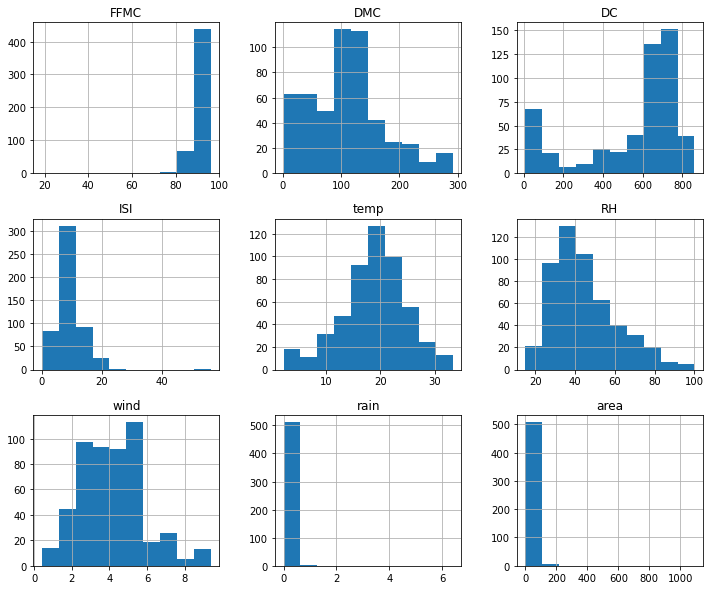

In [12]:
# Distribution of continous features
df1[features1].hist(figsize=(12,10))
plt.show()

In [13]:
for feature in features1:
  unique_values_count= len(df1[feature].unique())
  unique_values= df1[feature].unique()
  print('The {} has {} unique values as {}....'.format(feature, unique_values_count, unique_values[0:5]))

The FFMC has 106 unique values as [86.2 90.6 91.7 89.3 92.3]....
The DMC has 215 unique values as [26.2 35.4 43.7 33.3 51.3]....
The DC has 219 unique values as [ 94.3 669.1 686.9  77.5 102.2]....
The ISI has 119 unique values as [ 5.1  6.7  9.   9.6 14.7]....
The temp has 192 unique values as [ 8.2 18.  14.6  8.3 11.4]....
The RH has 75 unique values as [51 33 97 99 29]....
The wind has 21 unique values as [6.7 0.9 1.3 4.  1.8]....
The rain has 7 unique values as [0.  0.2 1.  6.4 0.8]....
The area has 251 unique values as [0.   0.36 0.43 0.47 0.55]....


#### Scalling the features

In [14]:
scaler= MinMaxScaler()
df2= pd.DataFrame(scaler.fit_transform(df1[features1]))
df2.head()

,0,1,2,3,4,5,6,7,8
0,0.870968,0.086492,0.101325,0.090909,0.192926,0.423529,0.700000,0.00000,0.0
1,0.927742,0.118194,0.775419,0.119430,0.508039,0.211765,0.055556,0.00000,0.0
2,0.927742,0.146795,0.796294,0.119430,0.398714,0.211765,0.100000,0.00000,0.0
3,0.941935,0.110958,0.081623,0.160428,0.196141,0.964706,0.400000,0.03125,0.0
4,0.910968,0.172984,0.110590,0.171123,0.295820,0.988235,0.155556,0.00000,0.0


In [15]:
df3= df1.iloc[:, 9:]
df3.head()

,dayfri,daymon,daysat,daysun,daythu,daytue,daywed,monthapr,monthaug,monthdec,monthfeb,monthjan,monthjul,monthjun,monthmar,monthmay,monthnov,monthoct,monthsep,size_category
0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,small
1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,small
2,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,small
3,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,small
4,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,small


In [16]:
final_df= pd.concat([df2,df3], axis=1 )
final_df.head()

,0,1,2,3,4,5,6,7,8,dayfri,...,monthfeb,monthjan,monthjul,monthjun,monthmar,monthmay,monthnov,monthoct,monthsep,size_category
0,0.870968,0.086492,0.101325,0.090909,0.192926,0.423529,0.700000,0.00000,0.0,1,...,0,0,0,0,1,0,0,0,0,small
1,0.927742,0.118194,0.775419,0.119430,0.508039,0.211765,0.055556,0.00000,0.0,0,...,0,0,0,0,0,0,0,1,0,small
2,0.927742,0.146795,0.796294,0.119430,0.398714,0.211765,0.100000,0.00000,0.0,0,...,0,0,0,0,0,0,0,1,0,small
3,0.941935,0.110958,0.081623,0.160428,0.196141,0.964706,0.400000,0.03125,0.0,1,...,0,0,0,0,1,0,0,0,0,small
4,0.910968,0.172984,0.110590,0.171123,0.295820,0.988235,0.155556,0.00000,0.0,0,...,0,0,0,0,1,0,0,0,0,small


In [17]:
# converting the target feature into numerical one hot coded feature
final_df['size_category']= pd.get_dummies(final_df['size_category'],drop_first=True)

In [18]:
final_df.head()

,0,1,2,3,4,5,6,7,8,dayfri,...,monthfeb,monthjan,monthjul,monthjun,monthmar,monthmay,monthnov,monthoct,monthsep,size_category
0,0.870968,0.086492,0.101325,0.090909,0.192926,0.423529,0.700000,0.00000,0.0,1,...,0,0,0,0,1,0,0,0,0,1
1,0.927742,0.118194,0.775419,0.119430,0.508039,0.211765,0.055556,0.00000,0.0,0,...,0,0,0,0,0,0,0,1,0,1
2,0.927742,0.146795,0.796294,0.119430,0.398714,0.211765,0.100000,0.00000,0.0,0,...,0,0,0,0,0,0,0,1,0,1
3,0.941935,0.110958,0.081623,0.160428,0.196141,0.964706,0.400000,0.03125,0.0,1,...,0,0,0,0,1,0,0,0,0,1
4,0.910968,0.172984,0.110590,0.171123,0.295820,0.988235,0.155556,0.00000,0.0,0,...,0,0,0,0,1,0,0,0,0,1


In [19]:
final_df.describe()

,0,1,2,3,4,5,6,7,8,dayfri,...,monthfeb,monthjan,monthjul,monthjun,monthmar,monthmay,monthnov,monthoct,monthsep,size_category
count,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,...,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000
mean,0.928318,0.378264,0.633329,0.160814,0.536629,0.344567,0.401956,0.003385,0.011777,0.164410,...,0.038685,0.003868,0.061896,0.032882,0.104449,0.003868,0.001934,0.029014,0.332689,0.731141
std,0.071227,0.220698,0.290918,0.081274,0.186708,0.191970,0.199073,0.046244,0.058355,0.371006,...,0.193029,0.062137,0.241199,0.178500,0.306138,0.062137,0.043980,0.168007,0.471632,0.443796
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.922581,0.232598,0.504046,0.115865,0.427653,0.211765,0.255556,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.940645,0.369400,0.769673,0.149733,0.549839,0.317647,0.400000,0.000000,0.000477,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
75%,0.957419,0.486906,0.827958,0.192513,0.662379,0.447059,0.500000,0.000000,0.006023,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [20]:
c= df1[features1].corr()
print(c)

          FFMC       DMC        DC       ISI      temp        RH      wind  \
FFMC  1.000000  0.382619  0.330512  0.531805  0.431532 -0.300995 -0.028485   
DMC   0.382619  1.000000  0.682192  0.305128  0.469594  0.073795 -0.105342   
DC    0.330512  0.682192  1.000000  0.229154  0.496208 -0.039192 -0.203466   
ISI   0.531805  0.305128  0.229154  1.000000  0.394287 -0.132517  0.106826   
temp  0.431532  0.469594  0.496208  0.394287  1.000000 -0.527390 -0.227116   
RH   -0.300995  0.073795 -0.039192 -0.132517 -0.527390  1.000000  0.069410   
wind -0.028485 -0.105342 -0.203466  0.106826 -0.227116  0.069410  1.000000   
rain  0.056702  0.074790  0.035861  0.067668  0.069491  0.099751  0.061119   
area  0.040122  0.072994  0.049383  0.008258  0.097844 -0.075519  0.012317   

          rain      area  
FFMC  0.056702  0.040122  
DMC   0.074790  0.072994  
DC    0.035861  0.049383  
ISI   0.067668  0.008258  
temp  0.069491  0.097844  
RH    0.099751 -0.075519  
wind  0.061119  0.012317  
rai

<AxesSubplot:>

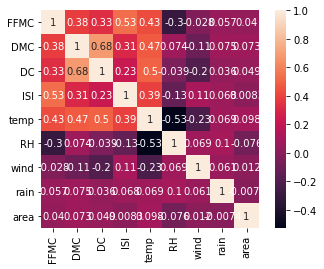

In [21]:
sns.heatmap(c, vmax=1, square=True, annot=True)

<AxesSubplot:xlabel='FFMC', ylabel='size_category'>

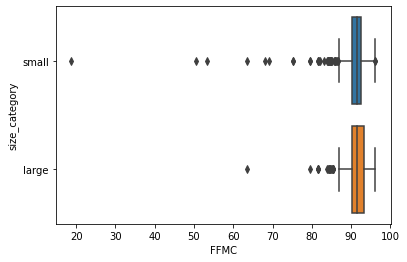

In [22]:
sns.boxplot(data= df1, x= 'FFMC', y= 'size_category')

<AxesSubplot:xlabel='DMC', ylabel='size_category'>

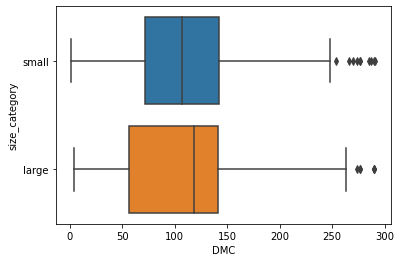

In [23]:
sns.boxplot(data= df1, x= 'DMC', y= 'size_category')

<AxesSubplot:xlabel='DC', ylabel='size_category'>

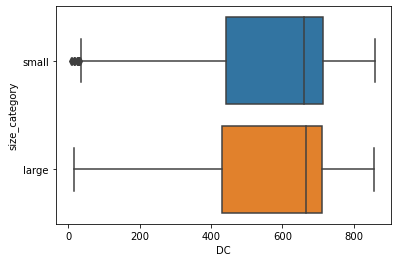

In [24]:
sns.boxplot(data= df1, x= 'DC', y= 'size_category')

<AxesSubplot:xlabel='ISI', ylabel='size_category'>

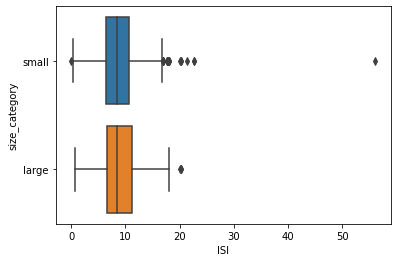

In [25]:
sns.boxplot(data= df1, x= 'ISI', y= 'size_category')

<AxesSubplot:xlabel='temp', ylabel='size_category'>

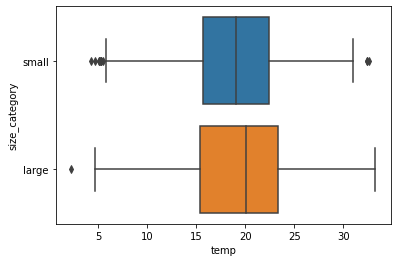

In [26]:
sns.boxplot(data= df1, x= 'temp', y= 'size_category')

<AxesSubplot:xlabel='size_category', ylabel='FFMC'>

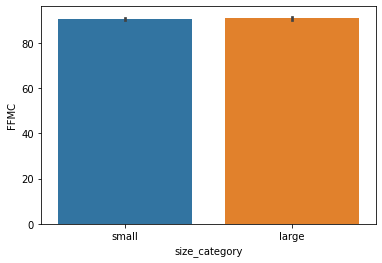

In [27]:
sns.barplot(data=df1, x='size_category', y='FFMC')

<AxesSubplot:xlabel='size_category', ylabel='DMC'>

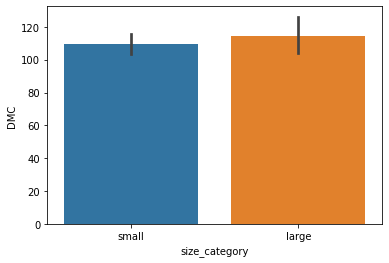

In [28]:
sns.barplot(data=df1, x='size_category', y='DMC')

<AxesSubplot:xlabel='size_category', ylabel='temp'>

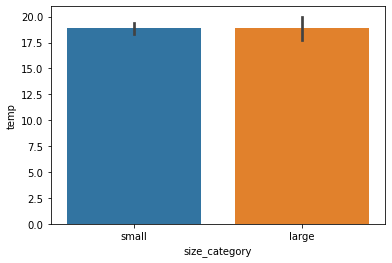

In [29]:
sns.barplot(data=df1, x='size_category', y='temp')

<AxesSubplot:xlabel='size_category', ylabel='DC'>

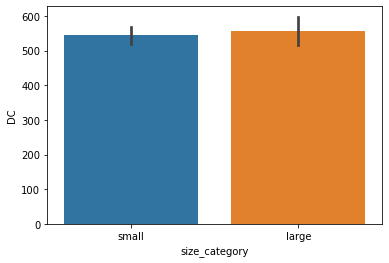

In [30]:
sns.barplot(data=df1, x='size_category', y='DC')

<AxesSubplot:xlabel='size_category', ylabel='ISI'>

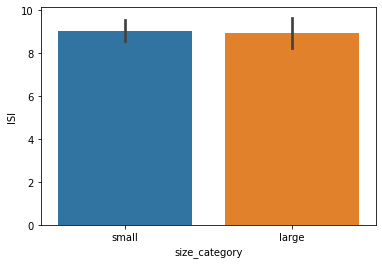

In [31]:
sns.barplot(data=df1, x='size_category', y='ISI')

#### Splitting data

In [32]:
x= final_df.drop(labels=['size_category'], axis=1)
print(x)
y= final_df['size_category']
print(y)

            0         1         2         3         4         5         6  \
0    0.870968  0.086492  0.101325  0.090909  0.192926  0.423529  0.700000   
1    0.927742  0.118194  0.775419  0.119430  0.508039  0.211765  0.055556   
2    0.927742  0.146795  0.796294  0.119430  0.398714  0.211765  0.100000   
3    0.941935  0.110958  0.081623  0.160428  0.196141  0.964706  0.400000   
4    0.910968  0.172984  0.110590  0.171123  0.295820  0.988235  0.155556   
..        ...       ...       ...       ...       ...       ...       ...   
512  0.811613  0.191592  0.771315  0.033868  0.823151  0.200000  0.255556   
513  0.811613  0.191592  0.771315  0.033868  0.633441  0.658824  0.600000   
514  0.811613  0.191592  0.771315  0.033868  0.610932  0.647059  0.700000   
515  0.976774  0.499311  0.711622  0.201426  0.752412  0.317647  0.400000   
516  0.784516  0.006547  0.115867  0.019608  0.308682  0.188235  0.455556   

           7         8  dayfri  ...  monthdec  monthfeb  monthjan  monthjul

#### Tuning Hyperparameters: Batch Size and epochs

In [33]:
# Create sequential model:
def base_model():
  model= Sequential()
  model.add(Dense(12, input_dim=28, kernel_initializer='uniform', activation='relu'))
  model.add(Dense(8, kernel_initializer='uniform', activation='relu'))
  model.add(Dense(8, kernel_initializer='uniform', activation='relu'))
  # output layer
  model.add(Dense(1, kernel_initializer='uniform', activation='sigmoid'))
  # optimizer 
  adam= Adam()
  # Compile model
  model.compile(loss= "binary_crossentropy", optimizer= adam, metrics= ['accuracy'])
  return model

# Define clasification model
classifier= KerasClassifier(build_fn=base_model, verbose= 0)
# Define GridSearch Model
batch_size= [10, 20, 40, 100]
epochs= [10, 20, 50, 100]
# make a Dictionary to store grid parameters
grid_param= dict(batch_size=batch_size, epochs=epochs )
# Build & Fit the gridsearchCV
grid= GridSearchCV(estimator=classifier, param_grid=grid_param, cv= KFold(), verbose=10 )
grid_results= grid.fit(x,y)

Fitting 5 folds for each of 16 candidates, totalling 80 fits
[CV] batch_size=10, epochs=10 ........................................


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV] ............ batch_size=10, epochs=10, score=1.000, total=  26.2s
[CV] batch_size=10, epochs=10 ........................................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:   26.1s remaining:    0.0s


[CV] ............ batch_size=10, epochs=10, score=0.750, total=   2.3s
[CV] batch_size=10, epochs=10 ........................................


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:   28.4s remaining:    0.0s


[CV] ............ batch_size=10, epochs=10, score=0.524, total=   3.0s
[CV] batch_size=10, epochs=10 ........................................


[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:   31.4s remaining:    0.0s


[CV] ............ batch_size=10, epochs=10, score=0.680, total=   3.1s
[CV] batch_size=10, epochs=10 ........................................


[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:   34.5s remaining:    0.0s


[CV] ............ batch_size=10, epochs=10, score=0.699, total=   3.1s
[CV] batch_size=10, epochs=20 ........................................


[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:   37.6s remaining:    0.0s


[CV] ............ batch_size=10, epochs=20, score=1.000, total=   3.7s
[CV] batch_size=10, epochs=20 ........................................


[Parallel(n_jobs=1)]: Done   6 out of   6 | elapsed:   41.3s remaining:    0.0s


[CV] ............ batch_size=10, epochs=20, score=0.750, total=   3.3s
[CV] batch_size=10, epochs=20 ........................................


[Parallel(n_jobs=1)]: Done   7 out of   7 | elapsed:   44.5s remaining:    0.0s


[CV] ............ batch_size=10, epochs=20, score=0.524, total=   3.6s
[CV] batch_size=10, epochs=20 ........................................


[Parallel(n_jobs=1)]: Done   8 out of   8 | elapsed:   48.2s remaining:    0.0s


[CV] ............ batch_size=10, epochs=20, score=0.680, total=   4.3s
[CV] batch_size=10, epochs=20 ........................................


[Parallel(n_jobs=1)]: Done   9 out of   9 | elapsed:   52.5s remaining:    0.0s


[CV] ............ batch_size=10, epochs=20, score=0.699, total=   4.7s
[CV] batch_size=10, epochs=50 ........................................
[CV] ............ batch_size=10, epochs=50, score=0.933, total=   4.8s
[CV] batch_size=10, epochs=50 ........................................
[CV] ............ batch_size=10, epochs=50, score=0.750, total=   5.7s
[CV] batch_size=10, epochs=50 ........................................
[CV] ............ batch_size=10, epochs=50, score=0.524, total=   5.5s
[CV] batch_size=10, epochs=50 ........................................
[CV] ............ batch_size=10, epochs=50, score=0.680, total=   5.0s
[CV] batch_size=10, epochs=50 ........................................
[CV] ............ batch_size=10, epochs=50, score=0.699, total=   5.6s
[CV] batch_size=10, epochs=100 .......................................
[CV] ........... batch_size=10, epochs=100, score=0.990, total=   8.2s
[CV] batch_size=10, epochs=100 .......................................
[CV] .

[CV] ........... batch_size=40, epochs=100, score=0.524, total=   4.8s
[CV] batch_size=40, epochs=100 .......................................
[CV] ........... batch_size=40, epochs=100, score=0.680, total=   4.3s
[CV] batch_size=40, epochs=100 .......................................
[CV] ........... batch_size=40, epochs=100, score=0.680, total=   3.6s
[CV] batch_size=100, epochs=10 .......................................
[CV] ........... batch_size=100, epochs=10, score=1.000, total=   2.7s
[CV] batch_size=100, epochs=10 .......................................
[CV] ........... batch_size=100, epochs=10, score=0.750, total=   2.6s
[CV] batch_size=100, epochs=10 .......................................
[CV] ........... batch_size=100, epochs=10, score=0.524, total=   2.8s
[CV] batch_size=100, epochs=10 .......................................
[CV] ........... batch_size=100, epochs=10, score=0.680, total=   2.6s
[CV] batch_size=100, epochs=10 .......................................
[CV] .

[Parallel(n_jobs=1)]: Done  80 out of  80 | elapsed:  5.4min finished


In [34]:
# summerize results
print('Best:{}, using {}'.format(grid_results.best_score_, grid_results.best_params_))
means= grid_results.cv_results_['mean_test_score']
stds= grid_results.cv_results_['std_test_score']
params= grid_results.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
  print('{},{} with: {}'.format(mean, stdev, param))

Best:0.7694361448287964, using {'batch_size': 10, 'epochs': 100}
0.7305825233459473,0.15435061319000673 with: {'batch_size': 10, 'epochs': 10}
0.7305825233459473,0.15435061319000673 with: {'batch_size': 10, 'epochs': 20}
0.7171209812164306,0.13151203303628495 with: {'batch_size': 10, 'epochs': 50}
0.7694361448287964,0.12389108299852011 with: {'batch_size': 10, 'epochs': 100}
0.7305825233459473,0.15435061319000673 with: {'batch_size': 20, 'epochs': 10}
0.7305825233459473,0.15435061319000673 with: {'batch_size': 20, 'epochs': 20}
0.7248319506645202,0.1408486021999489 with: {'batch_size': 20, 'epochs': 50}
0.7404592871665955,0.12257184225745908 with: {'batch_size': 20, 'epochs': 100}
0.7305825233459473,0.15435061319000673 with: {'batch_size': 40, 'epochs': 10}
0.7305825233459473,0.15435061319000673 with: {'batch_size': 40, 'epochs': 20}
0.7305825233459473,0.15435061319000673 with: {'batch_size': 40, 'epochs': 50}
0.7151605606079101,0.13548104637319094 with: {'batch_size': 40, 'epochs': 10

#### Tuning hyperparameter: Learning rate and dropout rate

In [35]:
# Create sequential model:
def base_model_lr_drate(learning_rate,dropout_rate):
  model= Sequential()
  model.add(Dense(12, input_dim=28, kernel_initializer='uniform', activation='relu'))
  model.add(Dropout(dropout_rate))
  model.add(Dense(8, kernel_initializer='uniform', activation='relu'))
  model.add(Dropout(dropout_rate))
  model.add(Dense(8, kernel_initializer='uniform', activation='relu'))
  model.add(Dropout(dropout_rate))
  # output layer
  model.add(Dense(1, kernel_initializer='uniform', activation='sigmoid'))
  # optimizer 
  adam= Adam(learning_rate=learning_rate)
  # Compile model
  model.compile(loss= "binary_crossentropy", optimizer= adam, metrics= ['accuracy'])
  return model

# Define clasification model
classifier= KerasClassifier(build_fn=base_model_lr_drate, verbose= 0, batch_size=10, epochs=100)
# Define GridSearch Model
learning_rate= [0.001, 0.01, 0.10, 0.2, 0.5]
dropout_rate= [0, 0.1, 0.2, 0.5]
# make a Dictionary to store grid parameters
grid_param= dict(learning_rate=learning_rate, dropout_rate=dropout_rate )
# Build & Fit the gridsearchCV
grid= GridSearchCV(estimator=classifier, param_grid=grid_param, cv= KFold(), verbose=10, return_train_score=True )
grid_results= grid.fit(x,y)

Fitting 5 folds for each of 20 candidates, totalling 100 fits
[CV] dropout_rate=0, learning_rate=0.001 .............................


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV]  dropout_rate=0, learning_rate=0.001, score=(train=0.985, test=1.000), total=  11.0s
[CV] dropout_rate=0, learning_rate=0.001 .............................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:   11.1s remaining:    0.0s


[CV]  dropout_rate=0, learning_rate=0.001, score=(train=0.901, test=0.769), total=   8.7s
[CV] dropout_rate=0, learning_rate=0.001 .............................


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:   19.9s remaining:    0.0s


[CV]  dropout_rate=0, learning_rate=0.001, score=(train=0.807, test=0.602), total=   9.0s
[CV] dropout_rate=0, learning_rate=0.001 .............................


[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:   29.0s remaining:    0.0s


[CV]  dropout_rate=0, learning_rate=0.001, score=(train=0.901, test=0.825), total=   8.8s
[CV] dropout_rate=0, learning_rate=0.001 .............................


[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:   38.0s remaining:    0.0s


[CV]  dropout_rate=0, learning_rate=0.001, score=(train=0.865, test=0.796), total=   8.8s
[CV] dropout_rate=0, learning_rate=0.01 ..............................


[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:   46.8s remaining:    0.0s


[CV]  dropout_rate=0, learning_rate=0.01, score=(train=0.947, test=0.933), total=   9.1s
[CV] dropout_rate=0, learning_rate=0.01 ..............................


[Parallel(n_jobs=1)]: Done   6 out of   6 | elapsed:   56.0s remaining:    0.0s


[CV]  dropout_rate=0, learning_rate=0.01, score=(train=0.995, test=0.885), total=   9.0s
[CV] dropout_rate=0, learning_rate=0.01 ..............................


[Parallel(n_jobs=1)]: Done   7 out of   7 | elapsed:  1.1min remaining:    0.0s


[CV]  dropout_rate=0, learning_rate=0.01, score=(train=0.981, test=0.922), total=   9.3s
[CV] dropout_rate=0, learning_rate=0.01 ..............................


[Parallel(n_jobs=1)]: Done   8 out of   8 | elapsed:  1.2min remaining:    0.0s


[CV]  dropout_rate=0, learning_rate=0.01, score=(train=0.969, test=0.913), total=   8.4s
[CV] dropout_rate=0, learning_rate=0.01 ..............................


[Parallel(n_jobs=1)]: Done   9 out of   9 | elapsed:  1.4min remaining:    0.0s


[CV]  dropout_rate=0, learning_rate=0.01, score=(train=0.983, test=0.883), total=   9.1s
[CV] dropout_rate=0, learning_rate=0.1 ...............................
[CV]  dropout_rate=0, learning_rate=0.1, score=(train=0.663, test=1.000), total=   8.4s
[CV] dropout_rate=0, learning_rate=0.1 ...............................
[CV]  dropout_rate=0, learning_rate=0.1, score=(train=0.726, test=0.750), total=   9.1s
[CV] dropout_rate=0, learning_rate=0.1 ...............................
[CV]  dropout_rate=0, learning_rate=0.1, score=(train=0.783, test=0.524), total=   8.5s
[CV] dropout_rate=0, learning_rate=0.1 ...............................
[CV]  dropout_rate=0, learning_rate=0.1, score=(train=0.744, test=0.680), total=   9.3s
[CV] dropout_rate=0, learning_rate=0.1 ...............................
[CV]  dropout_rate=0, learning_rate=0.1, score=(train=0.739, test=0.699), total=   9.7s
[CV] dropout_rate=0, learning_rate=0.2 ...............................
[CV]  dropout_rate=0, learning_rate=0.2, scor

[CV]  dropout_rate=0.2, learning_rate=0.1, score=(train=0.663, test=1.000), total=   8.9s
[CV] dropout_rate=0.2, learning_rate=0.1 .............................
[CV]  dropout_rate=0.2, learning_rate=0.1, score=(train=0.726, test=0.750), total=   9.0s
[CV] dropout_rate=0.2, learning_rate=0.1 .............................
[CV]  dropout_rate=0.2, learning_rate=0.1, score=(train=0.783, test=0.524), total=   8.6s
[CV] dropout_rate=0.2, learning_rate=0.1 .............................
[CV]  dropout_rate=0.2, learning_rate=0.1, score=(train=0.744, test=0.680), total=   9.3s
[CV] dropout_rate=0.2, learning_rate=0.1 .............................
[CV]  dropout_rate=0.2, learning_rate=0.1, score=(train=0.739, test=0.699), total=   8.7s
[CV] dropout_rate=0.2, learning_rate=0.2 .............................
[CV]  dropout_rate=0.2, learning_rate=0.2, score=(train=0.663, test=1.000), total=   9.2s
[CV] dropout_rate=0.2, learning_rate=0.2 .............................
[CV]  dropout_rate=0.2, learning_r

[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed: 15.3min finished


In [36]:
# summerize results
print('Best:{}, using {}'.format(grid_results.best_score_, grid_results.best_params_))
means= grid_results.cv_results_['mean_test_score']
stds= grid_results.cv_results_['std_test_score']
params= grid_results.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
  print('{},{} with: {}'.format(mean, stdev, param))

Best:0.9071508526802063, using {'dropout_rate': 0, 'learning_rate': 0.01}
0.7985063552856445,0.1271337324979231 with: {'dropout_rate': 0, 'learning_rate': 0.001}
0.9071508526802063,0.019900458084179912 with: {'dropout_rate': 0, 'learning_rate': 0.01}
0.7305825233459473,0.15435061319000673 with: {'dropout_rate': 0, 'learning_rate': 0.1}
0.7305825233459473,0.15435061319000673 with: {'dropout_rate': 0, 'learning_rate': 0.2}
0.7305825233459473,0.15435061319000673 with: {'dropout_rate': 0, 'learning_rate': 0.5}
0.7674570560455323,0.1317728173087896 with: {'dropout_rate': 0.1, 'learning_rate': 0.001}
0.864488422870636,0.05456011878868037 with: {'dropout_rate': 0.1, 'learning_rate': 0.01}
0.7305825233459473,0.15435061319000673 with: {'dropout_rate': 0.1, 'learning_rate': 0.1}
0.7305825233459473,0.15435061319000673 with: {'dropout_rate': 0.1, 'learning_rate': 0.2}
0.7305825233459473,0.15435061319000673 with: {'dropout_rate': 0.1, 'learning_rate': 0.5}
0.7540141820907593,0.1313677787472514 with

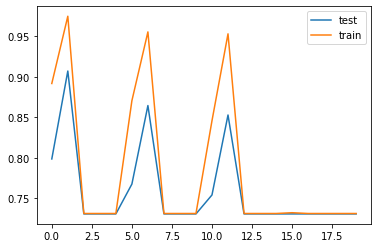

In [37]:
# plotting train test plot
test_scores= grid_results.cv_results_['mean_test_score']
train_scores=grid_results.cv_results_['mean_train_score']

plt.plot(test_scores, label='test')
plt.plot(train_scores, label= 'train')
plt.legend(loc='best')
plt.show()

#### Tuning hyperparameter: Activation function and Kernal initializer

In [38]:
# Create sequential model:
def base_model_af_init(init,activation_function):
  model= Sequential()
  model.add(Dense(12, input_dim=28, kernel_initializer=init, activation=activation_function))
  model.add(Dropout(0.1))
  model.add(Dense(8, kernel_initializer=init, activation=activation_function))
  model.add(Dropout(0.1))
  model.add(Dense(8, kernel_initializer=init, activation=activation_function))
  model.add(Dropout(0.1))
  # output layer
  model.add(Dense(1, kernel_initializer=init, activation='sigmoid'))
  # optimizer 
  adam= Adam(learning_rate=0.01)
  # Compile model
  model.compile(loss= "binary_crossentropy", optimizer= adam, metrics= ['accuracy'])
  return model

# Define clasification model
classifier= KerasClassifier(build_fn=base_model_af_init, verbose= 0, batch_size=10, epochs=100)
# Define GridSearch Model
init= ['uniform', 'normal', 'zero']
activation_function= ['relu', 'sigmoid', 'tanh', 'linear', 'softmax']
# make a Dictionary to store grid parameters
grid_param= dict(init=init, activation_function=activation_function )
# Build & Fit the gridsearchCV
grid= GridSearchCV(estimator=classifier, param_grid=grid_param, cv= KFold(), verbose=10, return_train_score=True )
grid_results= grid.fit(x,y)

Fitting 5 folds for each of 15 candidates, totalling 75 fits
[CV] activation_function=relu, init=uniform ..........................


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV]  activation_function=relu, init=uniform, score=(train=0.663, test=1.000), total=   9.3s
[CV] activation_function=relu, init=uniform ..........................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    9.4s remaining:    0.0s


[CV]  activation_function=relu, init=uniform, score=(train=0.966, test=0.827), total=   8.9s
[CV] activation_function=relu, init=uniform ..........................


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:   18.4s remaining:    0.0s


[CV]  activation_function=relu, init=uniform, score=(train=0.988, test=0.806), total=   9.1s
[CV] activation_function=relu, init=uniform ..........................


[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:   27.7s remaining:    0.0s


[CV]  activation_function=relu, init=uniform, score=(train=0.969, test=0.874), total=   8.9s
[CV] activation_function=relu, init=uniform ..........................


[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:   36.7s remaining:    0.0s


[CV]  activation_function=relu, init=uniform, score=(train=0.976, test=0.864), total=   9.6s
[CV] activation_function=relu, init=normal ...........................


[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:   46.4s remaining:    0.0s


[CV]  activation_function=relu, init=normal, score=(train=0.969, test=0.981), total=   8.6s
[CV] activation_function=relu, init=normal ...........................


[Parallel(n_jobs=1)]: Done   6 out of   6 | elapsed:   55.2s remaining:    0.0s


[CV]  activation_function=relu, init=normal, score=(train=0.978, test=0.856), total=   8.9s
[CV] activation_function=relu, init=normal ...........................


[Parallel(n_jobs=1)]: Done   7 out of   7 | elapsed:  1.1min remaining:    0.0s


[CV]  activation_function=relu, init=normal, score=(train=0.949, test=0.786), total=   8.8s
[CV] activation_function=relu, init=normal ...........................


[Parallel(n_jobs=1)]: Done   8 out of   8 | elapsed:  1.2min remaining:    0.0s


[CV]  activation_function=relu, init=normal, score=(train=0.990, test=0.854), total=   9.0s
[CV] activation_function=relu, init=normal ...........................


[Parallel(n_jobs=1)]: Done   9 out of   9 | elapsed:  1.4min remaining:    0.0s


[CV]  activation_function=relu, init=normal, score=(train=0.981, test=0.893), total=   9.2s
[CV] activation_function=relu, init=zero .............................
[CV]  activation_function=relu, init=zero, score=(train=0.663, test=1.000), total=   8.4s
[CV] activation_function=relu, init=zero .............................
[CV]  activation_function=relu, init=zero, score=(train=0.726, test=0.750), total=  10.1s
[CV] activation_function=relu, init=zero .............................
[CV]  activation_function=relu, init=zero, score=(train=0.783, test=0.524), total=   7.8s
[CV] activation_function=relu, init=zero .............................
[CV]  activation_function=relu, init=zero, score=(train=0.744, test=0.680), total=   9.5s
[CV] activation_function=relu, init=zero .............................
[CV]  activation_function=relu, init=zero, score=(train=0.739, test=0.699), total=   8.9s
[CV] activation_function=sigmoid, init=uniform .......................
[CV]  activation_function=sigmoi

[CV]  activation_function=linear, init=zero, score=(train=0.739, test=0.699), total=   8.7s
[CV] activation_function=softmax, init=uniform .......................
[CV]  activation_function=softmax, init=uniform, score=(train=0.855, test=0.981), total=   9.6s
[CV] activation_function=softmax, init=uniform .......................
[CV]  activation_function=softmax, init=uniform, score=(train=0.920, test=0.769), total=   9.3s
[CV] activation_function=softmax, init=uniform .......................
[CV]  activation_function=softmax, init=uniform, score=(train=0.812, test=0.495), total=   9.5s
[CV] activation_function=softmax, init=uniform .......................
[CV]  activation_function=softmax, init=uniform, score=(train=0.925, test=0.767), total=  10.2s
[CV] activation_function=softmax, init=uniform .......................
[CV]  activation_function=softmax, init=uniform, score=(train=0.891, test=0.757), total=   9.0s
[CV] activation_function=softmax, init=normal ........................
[C

[Parallel(n_jobs=1)]: Done  75 out of  75 | elapsed: 11.6min finished


In [39]:
# summerize results
print('Best:{}, using {}'.format(grid_results.best_score_, grid_results.best_params_))
means= grid_results.cv_results_['mean_test_score']
stds= grid_results.cv_results_['std_test_score']
params= grid_results.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
  print('{},{} with: {}'.format(mean, stdev, param))

Best:0.9418782591819763, using {'activation_function': 'linear', 'init': 'uniform'}
0.8741224765777588,0.06758470067659558 with: {'activation_function': 'relu', 'init': 'uniform'}
0.8741037964820861,0.06349573118407971 with: {'activation_function': 'relu', 'init': 'normal'}
0.7305825233459473,0.15435061319000673 with: {'activation_function': 'relu', 'init': 'zero'}
0.8431105375289917,0.08118963210766636 with: {'activation_function': 'sigmoid', 'init': 'uniform'}
0.847012710571289,0.08620710232135027 with: {'activation_function': 'sigmoid', 'init': 'normal'}
0.8373786330223083,0.08297501809429826 with: {'activation_function': 'sigmoid', 'init': 'zero'}
0.9303211331367492,0.04982824471381211 with: {'activation_function': 'tanh', 'init': 'uniform'}
0.9108849883079528,0.04882021602037089 with: {'activation_function': 'tanh', 'init': 'normal'}
0.7305825233459473,0.15435061319000673 with: {'activation_function': 'tanh', 'init': 'zero'}
0.9418782591819763,0.031867448198428926 with: {'activati

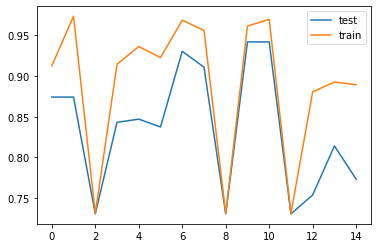

In [40]:
# plotting train test plot
test_scores= grid_results.cv_results_['mean_test_score']
train_scores=grid_results.cv_results_['mean_train_score']

plt.plot(test_scores, label='test')
plt.plot(train_scores, label= 'train')
plt.legend(loc='best')
plt.show()

#### Tuning hyperparameter: Number of neurons in activatino layer

In [41]:
# Create sequential model:
def base_model_num_neuron(neuron1,neuron2, neuron3):
  model= Sequential()
  model.add(Dense(neuron1, input_dim=28, kernel_initializer='normal', activation='linear'))
  model.add(Dropout(0.1))
  model.add(Dense(neuron2, kernel_initializer='normal', activation='linear'))
  model.add(Dropout(0.1))
  model.add(Dense(neuron3, kernel_initializer='normal', activation='linear'))
  model.add(Dropout(0.1))
  # output layer
  model.add(Dense(1, kernel_initializer='normal', activation='sigmoid'))
  # optimizer 
  adam= Adam(learning_rate=0.01)
  # Compile model
  model.compile(loss= "binary_crossentropy", optimizer= adam, metrics= ['accuracy'])
  return model

# Define clasification model
classifier= KerasClassifier(build_fn=base_model_num_neuron, verbose= 0, batch_size=10, epochs=100)
# Define GridSearch Model
neuron1= [2,8,16,25,30]
neuron2= [2,8,16,25,30]
neuron3= [2,8,16,25,30]
# make a Dictionary to store grid parameters
grid_param= dict(neuron1=neuron1, neuron2=neuron2, neuron3=neuron3)
# Build & Fit the gridsearchCV
grid= GridSearchCV(estimator=classifier, param_grid=grid_param, cv= KFold(), verbose=10, return_train_score=True )
grid_results= grid.fit(x,y)

Fitting 5 folds for each of 125 candidates, totalling 625 fits
[CV] neuron1=2, neuron2=2, neuron3=2 .................................


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV]  neuron1=2, neuron2=2, neuron3=2, score=(train=0.966, test=1.000), total=   8.1s
[CV] neuron1=2, neuron2=2, neuron3=2 .................................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    8.2s remaining:    0.0s


[CV]  neuron1=2, neuron2=2, neuron3=2, score=(train=0.956, test=0.942), total=   9.4s
[CV] neuron1=2, neuron2=2, neuron3=2 .................................


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:   17.7s remaining:    0.0s


[CV]  neuron1=2, neuron2=2, neuron3=2, score=(train=0.949, test=0.951), total=   9.2s
[CV] neuron1=2, neuron2=2, neuron3=2 .................................


[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:   27.1s remaining:    0.0s


[CV]  neuron1=2, neuron2=2, neuron3=2, score=(train=0.966, test=0.932), total=   9.2s
[CV] neuron1=2, neuron2=2, neuron3=2 .................................


[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:   36.3s remaining:    0.0s


[CV]  neuron1=2, neuron2=2, neuron3=2, score=(train=0.961, test=0.922), total=  10.5s
[CV] neuron1=2, neuron2=2, neuron3=8 .................................


[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:   47.0s remaining:    0.0s


[CV]  neuron1=2, neuron2=2, neuron3=8, score=(train=0.913, test=1.000), total=  10.1s
[CV] neuron1=2, neuron2=2, neuron3=8 .................................


[Parallel(n_jobs=1)]: Done   6 out of   6 | elapsed:   57.3s remaining:    0.0s


[CV]  neuron1=2, neuron2=2, neuron3=8, score=(train=0.985, test=0.971), total=   9.8s
[CV] neuron1=2, neuron2=2, neuron3=8 .................................


[Parallel(n_jobs=1)]: Done   7 out of   7 | elapsed:  1.1min remaining:    0.0s


[CV]  neuron1=2, neuron2=2, neuron3=8, score=(train=0.918, test=0.913), total=   8.5s
[CV] neuron1=2, neuron2=2, neuron3=8 .................................


[Parallel(n_jobs=1)]: Done   8 out of   8 | elapsed:  1.3min remaining:    0.0s


[CV]  neuron1=2, neuron2=2, neuron3=8, score=(train=0.990, test=0.942), total=   8.2s
[CV] neuron1=2, neuron2=2, neuron3=8 .................................


[Parallel(n_jobs=1)]: Done   9 out of   9 | elapsed:  1.4min remaining:    0.0s


[CV]  neuron1=2, neuron2=2, neuron3=8, score=(train=0.981, test=0.922), total=   9.9s
[CV] neuron1=2, neuron2=2, neuron3=16 ................................
[CV]  neuron1=2, neuron2=2, neuron3=16, score=(train=0.947, test=1.000), total=   8.1s
[CV] neuron1=2, neuron2=2, neuron3=16 ................................
[CV]  neuron1=2, neuron2=2, neuron3=16, score=(train=0.947, test=0.885), total=   7.9s
[CV] neuron1=2, neuron2=2, neuron3=16 ................................
[CV]  neuron1=2, neuron2=2, neuron3=16, score=(train=0.952, test=0.961), total=   8.5s
[CV] neuron1=2, neuron2=2, neuron3=16 ................................
[CV]  neuron1=2, neuron2=2, neuron3=16, score=(train=0.976, test=0.932), total=   7.6s
[CV] neuron1=2, neuron2=2, neuron3=16 ................................
[CV]  neuron1=2, neuron2=2, neuron3=16, score=(train=0.973, test=0.922), total=   5.9s
[CV] neuron1=2, neuron2=2, neuron3=25 ................................
[CV]  neuron1=2, neuron2=2, neuron3=25, score=(train=

[CV]  neuron1=2, neuron2=16, neuron3=16, score=(train=0.971, test=0.923), total=   8.6s
[CV] neuron1=2, neuron2=16, neuron3=16 ...............................
[CV]  neuron1=2, neuron2=16, neuron3=16, score=(train=0.937, test=0.913), total=   8.1s
[CV] neuron1=2, neuron2=16, neuron3=16 ...............................
[CV]  neuron1=2, neuron2=16, neuron3=16, score=(train=0.973, test=0.951), total=   8.9s
[CV] neuron1=2, neuron2=16, neuron3=16 ...............................
[CV]  neuron1=2, neuron2=16, neuron3=16, score=(train=0.973, test=0.903), total=   7.9s
[CV] neuron1=2, neuron2=16, neuron3=25 ...............................
[CV]  neuron1=2, neuron2=16, neuron3=25, score=(train=0.981, test=1.000), total=   9.0s
[CV] neuron1=2, neuron2=16, neuron3=25 ...............................
[CV]  neuron1=2, neuron2=16, neuron3=25, score=(train=0.976, test=0.952), total=   8.5s
[CV] neuron1=2, neuron2=16, neuron3=25 ...............................
[CV]  neuron1=2, neuron2=16, neuron3=25, score

[CV]  neuron1=2, neuron2=30, neuron3=16, score=(train=0.969, test=0.913), total=  10.0s
[CV] neuron1=2, neuron2=30, neuron3=16 ...............................
[CV]  neuron1=2, neuron2=30, neuron3=16, score=(train=0.971, test=0.903), total=   9.3s
[CV] neuron1=2, neuron2=30, neuron3=25 ...............................
[CV]  neuron1=2, neuron2=30, neuron3=25, score=(train=0.966, test=1.000), total=   9.6s
[CV] neuron1=2, neuron2=30, neuron3=25 ...............................
[CV]  neuron1=2, neuron2=30, neuron3=25, score=(train=0.952, test=0.875), total=   9.0s
[CV] neuron1=2, neuron2=30, neuron3=25 ...............................
[CV]  neuron1=2, neuron2=30, neuron3=25, score=(train=0.940, test=0.942), total=   9.2s
[CV] neuron1=2, neuron2=30, neuron3=25 ...............................
[CV]  neuron1=2, neuron2=30, neuron3=25, score=(train=0.988, test=0.932), total=   8.8s
[CV] neuron1=2, neuron2=30, neuron3=25 ...............................
[CV]  neuron1=2, neuron2=30, neuron3=25, score

[CV]  neuron1=8, neuron2=8, neuron3=25, score=(train=0.954, test=1.000), total=   8.3s
[CV] neuron1=8, neuron2=8, neuron3=25 ................................
[CV]  neuron1=8, neuron2=8, neuron3=25, score=(train=0.981, test=0.952), total=   8.3s
[CV] neuron1=8, neuron2=8, neuron3=25 ................................
[CV]  neuron1=8, neuron2=8, neuron3=25, score=(train=0.986, test=0.961), total=   9.2s
[CV] neuron1=8, neuron2=8, neuron3=25 ................................
[CV]  neuron1=8, neuron2=8, neuron3=25, score=(train=0.976, test=0.951), total=   8.1s
[CV] neuron1=8, neuron2=8, neuron3=25 ................................
[CV]  neuron1=8, neuron2=8, neuron3=25, score=(train=0.976, test=0.961), total=   8.5s
[CV] neuron1=8, neuron2=8, neuron3=30 ................................
[CV]  neuron1=8, neuron2=8, neuron3=30, score=(train=0.976, test=0.990), total=   8.0s
[CV] neuron1=8, neuron2=8, neuron3=30 ................................
[CV]  neuron1=8, neuron2=8, neuron3=30, score=(train

[CV]  neuron1=8, neuron2=25, neuron3=25, score=(train=0.971, test=0.971), total=   9.3s
[CV] neuron1=8, neuron2=25, neuron3=25 ...............................
[CV]  neuron1=8, neuron2=25, neuron3=25, score=(train=0.983, test=0.942), total=   9.8s
[CV] neuron1=8, neuron2=25, neuron3=25 ...............................
[CV]  neuron1=8, neuron2=25, neuron3=25, score=(train=0.973, test=0.951), total=  10.9s
[CV] neuron1=8, neuron2=25, neuron3=30 ...............................
[CV]  neuron1=8, neuron2=25, neuron3=30, score=(train=0.952, test=1.000), total=   8.9s
[CV] neuron1=8, neuron2=25, neuron3=30 ...............................
[CV]  neuron1=8, neuron2=25, neuron3=30, score=(train=0.954, test=0.923), total=   9.6s
[CV] neuron1=8, neuron2=25, neuron3=30 ...............................
[CV]  neuron1=8, neuron2=25, neuron3=30, score=(train=0.908, test=0.913), total=   9.6s
[CV] neuron1=8, neuron2=25, neuron3=30 ...............................
[CV]  neuron1=8, neuron2=25, neuron3=30, score

[CV]  neuron1=16, neuron2=2, neuron3=25, score=(train=0.973, test=0.932), total=   9.3s
[CV] neuron1=16, neuron2=2, neuron3=30 ...............................
[CV]  neuron1=16, neuron2=2, neuron3=30, score=(train=0.954, test=1.000), total=   9.5s
[CV] neuron1=16, neuron2=2, neuron3=30 ...............................
[CV]  neuron1=16, neuron2=2, neuron3=30, score=(train=0.973, test=0.933), total=   8.6s
[CV] neuron1=16, neuron2=2, neuron3=30 ...............................
[CV]  neuron1=16, neuron2=2, neuron3=30, score=(train=0.976, test=0.961), total=   9.0s
[CV] neuron1=16, neuron2=2, neuron3=30 ...............................
[CV]  neuron1=16, neuron2=2, neuron3=30, score=(train=0.966, test=0.922), total=   9.1s
[CV] neuron1=16, neuron2=2, neuron3=30 ...............................
[CV]  neuron1=16, neuron2=2, neuron3=30, score=(train=0.966, test=0.913), total=   9.4s
[CV] neuron1=16, neuron2=8, neuron3=2 ................................
[CV]  neuron1=16, neuron2=8, neuron3=2, score=

[CV]  neuron1=16, neuron2=16, neuron3=30, score=(train=0.978, test=0.952), total=   9.1s
[CV] neuron1=16, neuron2=16, neuron3=30 ..............................
[CV]  neuron1=16, neuron2=16, neuron3=30, score=(train=0.961, test=0.951), total=   9.6s
[CV] neuron1=16, neuron2=16, neuron3=30 ..............................
[CV]  neuron1=16, neuron2=16, neuron3=30, score=(train=0.971, test=0.922), total=   9.1s
[CV] neuron1=16, neuron2=16, neuron3=30 ..............................
[CV]  neuron1=16, neuron2=16, neuron3=30, score=(train=0.957, test=0.942), total=   9.4s
[CV] neuron1=16, neuron2=25, neuron3=2 ...............................
[CV]  neuron1=16, neuron2=25, neuron3=2, score=(train=0.891, test=1.000), total=   9.5s
[CV] neuron1=16, neuron2=25, neuron3=2 ...............................
[CV]  neuron1=16, neuron2=25, neuron3=2, score=(train=0.985, test=0.971), total=   8.7s
[CV] neuron1=16, neuron2=25, neuron3=2 ...............................
[CV]  neuron1=16, neuron2=25, neuron3=2, s

[CV]  neuron1=16, neuron2=30, neuron3=30, score=(train=0.978, test=0.922), total=   9.7s
[CV] neuron1=16, neuron2=30, neuron3=30 ..............................
[CV]  neuron1=16, neuron2=30, neuron3=30, score=(train=0.976, test=0.932), total=  10.0s
[CV] neuron1=25, neuron2=2, neuron3=2 ................................
[CV]  neuron1=25, neuron2=2, neuron3=2, score=(train=0.976, test=1.000), total=   9.9s
[CV] neuron1=25, neuron2=2, neuron3=2 ................................
[CV]  neuron1=25, neuron2=2, neuron3=2, score=(train=0.973, test=0.942), total=   9.8s
[CV] neuron1=25, neuron2=2, neuron3=2 ................................
[CV]  neuron1=25, neuron2=2, neuron3=2, score=(train=0.983, test=0.981), total=   9.1s
[CV] neuron1=25, neuron2=2, neuron3=2 ................................
[CV]  neuron1=25, neuron2=2, neuron3=2, score=(train=0.957, test=0.922), total=   9.9s
[CV] neuron1=25, neuron2=2, neuron3=2 ................................
[CV]  neuron1=25, neuron2=2, neuron3=2, score=(t

[CV]  neuron1=25, neuron2=16, neuron3=2, score=(train=0.947, test=1.000), total=   4.8s
[CV] neuron1=25, neuron2=16, neuron3=2 ...............................
[CV]  neuron1=25, neuron2=16, neuron3=2, score=(train=0.985, test=0.933), total=   3.9s
[CV] neuron1=25, neuron2=16, neuron3=2 ...............................
[CV]  neuron1=25, neuron2=16, neuron3=2, score=(train=0.978, test=0.971), total=   4.0s
[CV] neuron1=25, neuron2=16, neuron3=2 ...............................
[CV]  neuron1=25, neuron2=16, neuron3=2, score=(train=0.988, test=0.942), total=   3.8s
[CV] neuron1=25, neuron2=16, neuron3=2 ...............................
[CV]  neuron1=25, neuron2=16, neuron3=2, score=(train=0.986, test=0.942), total=   3.5s
[CV] neuron1=25, neuron2=16, neuron3=8 ...............................
[CV]  neuron1=25, neuron2=16, neuron3=8, score=(train=0.964, test=1.000), total=   3.7s
[CV] neuron1=25, neuron2=16, neuron3=8 ...............................
[CV]  neuron1=25, neuron2=16, neuron3=8, score

[CV]  neuron1=25, neuron2=30, neuron3=2, score=(train=0.969, test=0.971), total=   3.9s
[CV] neuron1=25, neuron2=30, neuron3=2 ...............................
[CV]  neuron1=25, neuron2=30, neuron3=2, score=(train=0.983, test=0.932), total=   3.7s
[CV] neuron1=25, neuron2=30, neuron3=2 ...............................
[CV]  neuron1=25, neuron2=30, neuron3=2, score=(train=0.959, test=0.903), total=   3.6s
[CV] neuron1=25, neuron2=30, neuron3=8 ...............................
[CV]  neuron1=25, neuron2=30, neuron3=8, score=(train=0.976, test=0.990), total=   3.6s
[CV] neuron1=25, neuron2=30, neuron3=8 ...............................
[CV]  neuron1=25, neuron2=30, neuron3=8, score=(train=0.983, test=0.904), total=   3.8s
[CV] neuron1=25, neuron2=30, neuron3=8 ...............................
[CV]  neuron1=25, neuron2=30, neuron3=8, score=(train=0.973, test=0.971), total=   3.9s
[CV] neuron1=25, neuron2=30, neuron3=8 ...............................
[CV]  neuron1=25, neuron2=30, neuron3=8, score

[CV]  neuron1=30, neuron2=8, neuron3=2, score=(train=0.976, test=0.913), total=   3.6s
[CV] neuron1=30, neuron2=8, neuron3=8 ................................
[CV]  neuron1=30, neuron2=8, neuron3=8, score=(train=0.978, test=1.000), total=   3.7s
[CV] neuron1=30, neuron2=8, neuron3=8 ................................
[CV]  neuron1=30, neuron2=8, neuron3=8, score=(train=0.961, test=0.894), total=   3.5s
[CV] neuron1=30, neuron2=8, neuron3=8 ................................
[CV]  neuron1=30, neuron2=8, neuron3=8, score=(train=0.973, test=0.981), total=   4.0s
[CV] neuron1=30, neuron2=8, neuron3=8 ................................
[CV]  neuron1=30, neuron2=8, neuron3=8, score=(train=0.983, test=0.942), total=   3.4s
[CV] neuron1=30, neuron2=8, neuron3=8 ................................
[CV]  neuron1=30, neuron2=8, neuron3=8, score=(train=0.981, test=0.922), total=   3.4s
[CV] neuron1=30, neuron2=8, neuron3=16 ...............................
[CV]  neuron1=30, neuron2=8, neuron3=16, score=(trai

[CV]  neuron1=30, neuron2=25, neuron3=8, score=(train=0.969, test=0.913), total=   4.2s
[CV] neuron1=30, neuron2=25, neuron3=8 ...............................
[CV]  neuron1=30, neuron2=25, neuron3=8, score=(train=0.954, test=0.932), total=   3.8s
[CV] neuron1=30, neuron2=25, neuron3=8 ...............................
[CV]  neuron1=30, neuron2=25, neuron3=8, score=(train=0.990, test=0.951), total=   3.8s
[CV] neuron1=30, neuron2=25, neuron3=8 ...............................
[CV]  neuron1=30, neuron2=25, neuron3=8, score=(train=0.957, test=0.922), total=   3.5s
[CV] neuron1=30, neuron2=25, neuron3=16 ..............................
[CV]  neuron1=30, neuron2=25, neuron3=16, score=(train=0.961, test=1.000), total=   4.1s
[CV] neuron1=30, neuron2=25, neuron3=16 ..............................
[CV]  neuron1=30, neuron2=25, neuron3=16, score=(train=0.947, test=0.894), total=   3.7s
[CV] neuron1=30, neuron2=25, neuron3=16 ..............................
[CV]  neuron1=30, neuron2=25, neuron3=16, sc

[Parallel(n_jobs=1)]: Done 625 out of 625 | elapsed: 73.3min finished


In [42]:
# summerize results
print('Best:{}, using {}'.format(grid_results.best_score_, grid_results.best_params_))
means= grid_results.cv_results_['mean_test_score']
stds= grid_results.cv_results_['std_test_score']
params= grid_results.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
  print('{},{} with: {}'.format(mean, stdev, param))

Best:0.9670649647712708, using {'neuron1': 30, 'neuron2': 2, 'neuron3': 8}
0.9496265888214112,0.027014153697387244 with: {'neuron1': 2, 'neuron2': 2, 'neuron3': 2}
0.9495705723762512,0.03217903744899643 with: {'neuron1': 2, 'neuron2': 2, 'neuron3': 8}
0.9400298714637756,0.0387066401065185 with: {'neuron1': 2, 'neuron2': 2, 'neuron3': 16}
0.9437826633453369,0.032745597813173544 with: {'neuron1': 2, 'neuron2': 2, 'neuron3': 25}
0.9593166470527649,0.024067069538717917 with: {'neuron1': 2, 'neuron2': 2, 'neuron3': 30}
0.9496079087257385,0.02705276345627237 with: {'neuron1': 2, 'neuron2': 8, 'neuron3': 2}
0.9439507126808167,0.045248709206236 with: {'neuron1': 2, 'neuron2': 8, 'neuron3': 8}
0.9554705023765564,0.02489701845106395 with: {'neuron1': 2, 'neuron2': 8, 'neuron3': 16}
0.9399178624153137,0.032149182238633965 with: {'neuron1': 2, 'neuron2': 8, 'neuron3': 25}
0.9438013434410095,0.04227028865934585 with: {'neuron1': 2, 'neuron2': 8, 'neuron3': 30}
0.94576176404953,0.036130290095976215 

#### modeling with optimum hyperparameters:

In [43]:
# Create sequential model:
def base_model_optimized():
  model= Sequential()
  model.add(Dense(16, input_dim=28, kernel_initializer='normal', activation='linear'))
  model.add(Dropout(0.1))
  model.add(Dense(16, kernel_initializer='normal', activation='linear'))
  model.add(Dropout(0.1))
  model.add(Dense(8, kernel_initializer='normal', activation='linear'))
  model.add(Dropout(0.1))
  # output layer
  model.add(Dense(1, kernel_initializer='normal', activation='sigmoid'))
  # optimizer 
  adam= Adam(learning_rate=0.01)
  # Compile model
  model.compile(loss= "binary_crossentropy", optimizer= adam, metrics= ['accuracy'])
  return model

# Define clasification model
classifier= KerasClassifier(build_fn=base_model_optimized, verbose= 0, batch_size=10, epochs=100)
 
from sklearn.model_selection import train_test_split
from sklearn.metrics import  confusion_matrix
x_train, x_test, y_train, y_test= train_test_split(x,y, test_size=0.25, random_state=0)

history= classifier.fit(x_train,y_train, validation_split=0.25)

# predicting for validation set
y_predict= classifier.predict(x_test)

#printing the metrics
print(accuracy_score(y_test, y_predict))

C:\Users\Anirudh MV\anaconda3\lib\site-packages\keras\engine\sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


0.9153846153846154


In [44]:
# Constructing the confusion matrix.
from sklearn.metrics import confusion_matrix, precision_score, f1_score,recall_score
print('confusion matrix \n',confusion_matrix(y_test, y_predict))
print('precision_score:',precision_score(y_test, y_predict))
print('recall_score:   ',recall_score(y_test, y_predict))
print('f1_score:       ',f1_score(y_test, y_predict))

confusion matrix 
 [[35  2]
 [ 9 84]]
precision_score: 0.9767441860465116
recall_score:    0.9032258064516129
f1_score:        0.9385474860335195


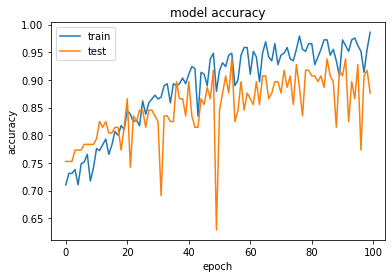

In [45]:
# summarize history for accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

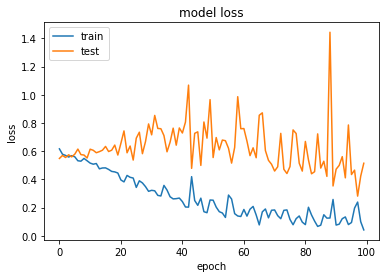

In [46]:
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()